### Relax Challenge
#### Given 2 csv files of users info and user engagement we are asked to identify factor which predict future user adoption
#### User adoption is defined as a user who has logged into the product on 3 separate days in at least one 7 day period

In [171]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [172]:
df_users = pd.read_csv('takehome_users.csv', encoding = 'latin1')
df_engagement = pd.read_csv('takehome_user_engagement.csv')

In [173]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [174]:
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [175]:
#convert datetime 
#covernt int columns
#fill missing values

df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'],format ='%Y-%m-%d %H:%M:%S')
df_users['object_id'] = df_users['object_id'].astype(int)
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'],format ='%Y-%m-%d %H:%M:%S')
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')
df_users['opted_in_to_mailing_list'] = df_users['opted_in_to_mailing_list'].astype(int)
df_users['enabled_for_marketing_drip'] = df_users['enabled_for_marketing_drip'].astype(int)
df_users['org_id'] = df_users['org_id'].astype(int)
df_users = df_users.fillna(0)
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].astype(int)
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143


In [176]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int32
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int32
enabled_for_marketing_drip    12000 non-null int32
org_id                        12000 non-null int32
invited_by_user_id            12000 non-null int32
dtypes: datetime64[ns](2), int32(5), object(3)
memory usage: 703.2+ KB


In [177]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [289]:
#how many unique user ids are there?
len(df_engagement['user_id'].unique())

8823

In [296]:
period = datetime.timedelta(7)
adopted_users = {}

for id in df_engagement['user_id'].unique():                          #loop the each unique user id
        adopted = 0
        user_logins = df_engagement.loc[(df_engagement.user_id == id)]    #isolate each user as temp df user_logins
        user_logins = user_logins.sort_values('time_stamp')       #sort all the logins of particular user by time_Stamp
        
        #cycle through all logins for each user_id and determine if they are adopted (1) or not (0/False)
        for index,row in user_logins.iterrows():
            row_time = row.time_stamp
            if len(user_logins[(user_logins['time_stamp'] >= row_time) & (user_logins['time_stamp'] <= (row_time+period))])>=3:
                adopted = 1
        adopted_users[id] = adopted


In [301]:
adopted_df = pd.DataFrame.from_dict(adopted_users, orient = 'index').reset_index()
adopted_df.columns = ['user_id', 'adopted_flag']
adopted_df.head()
#this gives us a df of unique user IDs and whether they are considered adopted users.

,user_id,adopted_flag
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [413]:
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
user_id         8823 non-null int64
adopted_flag    8823 non-null int64
dtypes: int64(2)
memory usage: 137.9 KB


In [302]:
#now let's see the adopted user capture rate.
all_count = len(adopted_df)
adopted_count = len(adopted_df[adopted_df['adopted_flag']==1])
capture = adopted_count/all_count
print('The total users:                     ', all_count)
print('The total number of adopted users:   ', adopted_count)
print('the capture rate is:                 ', capture)

The total users:                      8823
The total number of adopted users:    1656
the capture rate is:                  0.18769126147568854


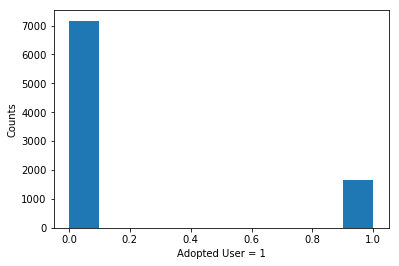

In [317]:
adopted_df['adopted_flag'].plot(kind = 'hist')
plt.xlabel('Adopted User = 1')
plt.ylabel('Counts')

In [414]:
#let combine the adopted df into the df_users for analysis
df_users['adopted_flag'] = 0                                        #create new column
mapper = adopted_df.set_index('user_id')['adopted_flag'].to_dict()  #map the adopted df
df_users['adopted_flag'] = df_users['object_id'].map(mapper)        #apply map to new colum in df_users
print('the adopter user rate from users data file:', len(df_users[df_users['adopted_flag']== 1]) / len(df_users)*100)
df_users[['adopted_flag']] = df_users[['adopted_flag']].fillna(value=0)
df_users.head()

the adopter user rate from users data file: 13.8


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_flag
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0.0


In [415]:
df_users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_flag
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,3188.691333,0.138000
std,3464.24595,0.432742,0.356432,124.056723,3869.027693,0.344914
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,875.000000,0.000000
75%,9000.25000,0.000000,0.000000,238.250000,6317.000000,0.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,1.000000


In [428]:
#let's drop all the user name, email, and dates
df_filt_users = df_users[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
                          'invited_by_user_id','adopted_flag', 'creation_source']]
df_filt_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_flag,creation_source
0,1,0,11,10803,0.0,GUEST_INVITE
1,0,0,1,316,1.0,ORG_INVITE
2,0,0,94,1525,0.0,ORG_INVITE
3,0,0,1,5151,0.0,GUEST_INVITE
4,0,0,193,5240,0.0,GUEST_INVITE


### Now we have adopted labels for each user id per the defined criteria.  With this we are asked to identify features of user_ids that predict whether user is adopted.  

In [429]:
X = df_filt_users.select_dtypes(include=[object])
X.head(3)

,creation_source
0,GUEST_INVITE
1,ORG_INVITE
2,ORG_INVITE


#### There is one object column which needs to be labelized and encoded 'creation_source'.  We will leave name and email alone.

In [430]:
print(list(set(X.creation_source)))

['SIGNUP_GOOGLE_AUTH', 'ORG_INVITE', 'PERSONAL_PROJECTS', 'GUEST_INVITE', 'SIGNUP']


#### We can see there are 5 unique creation sources of users

In [431]:
encoded_df = pd.get_dummies(df_filt_users, columns = ['creation_source'])
encoded_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_flag,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803,0.0,1,0,0,0,0
1,0,0,1,316,1.0,0,1,0,0,0
2,0,0,94,1525,0.0,0,1,0,0,0
3,0,0,1,5151,0.0,1,0,0,0,0
4,0,0,193,5240,0.0,1,0,0,0,0


In [432]:
#split into X data and y labels
X = encoded_df.drop('adopted_flag',axis=1)
y = encoded_df['adopted_flag']
print (X.shape)
print (y.shape)

(12000, 9)
(12000,)


In [433]:
y.describe()

count    12000.000000
mean         0.138000
std          0.344914
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: adopted_flag, dtype: float64

In [434]:
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

#create instances
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', LinearSVC(C = .001)))
for model in models:
    print (model, '\n')

('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')) 

('RFC', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)) 

('SVM', LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)) 



In [435]:
results = []
precision = []
recall = []
names = []
scoring = 'accuracy'


#loop through models and let cross_val_score perform train/test splits for us.

for name,model in models:
    skf = StratifiedKFold(n_splits=10, random_state=42)  #we will use stratifiedKfold
    cv_results = model_selection.cross_val_score(model, X, y, cv = skf, scoring = scoring)
    prec = model_selection.cross_val_score(model, X, y, cv = skf, scoring='precision')
    rec = model_selection.cross_val_score(model, X, y, cv = skf, scoring='recall')
    
    results.append(cv_results)
    precision.append(prec)
    recall.append(rec)
    names.append(name)
    
    print ('Accuracy  Results {:8}:    mean {:.2f},   std{:.2f},    '.format(name, cv_results.mean(), cv_results.std()))
    print ('Precision Results {:8}:    mean {:.2f},   std{:.2f},    '.format(name, prec.mean(), prec.std()))
    print ('Recall    Results {:8}:    mean {:.2f},   std{:.2f},    '.format(name, rec.mean(), rec.std()))
    print ('\n')

Accuracy  Results KNN     :    mean 0.84,   std0.01,    
Precision Results KNN     :    mean 0.15,   std0.08,    
Recall    Results KNN     :    mean 0.03,   std0.01,    


Accuracy  Results RFC     :    mean 0.82,   std0.01,    
Precision Results RFC     :    mean 0.19,   std0.02,    
Recall    Results RFC     :    mean 0.10,   std0.02,    




C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

Accuracy  Results SVM     :    mean 0.83,   std0.10,    
Precision Results SVM     :    mean 0.03,   std0.06,    
Recall    Results SVM     :    mean 0.05,   std0.14,    




In [438]:
#Best result was on K-neighbors default.  Let's check most important features by refitting the model on X,y on the 
#RandomForestClassifier to see feature importance.

RFC = RandomForestClassifier()
RFC.fit(X,y)

feature_importance = pd.DataFrame(RFC.feature_importances_).T
feature_importance.columns = list(X.columns)
feature_df = feature_importance.T
feature_df.sort_values(feature_df.columns[0])

,0
creation_source_SIGNUP,0.001714
creation_source_ORG_INVITE,0.001941
creation_source_SIGNUP_GOOGLE_AUTH,0.002075
creation_source_GUEST_INVITE,0.002688
creation_source_PERSONAL_PROJECTS,0.006446
enabled_for_marketing_drip,0.009197
opted_in_to_mailing_list,0.011019
invited_by_user_id,0.359156
org_id,0.605764


### We can now see the org_id and invited_by_user_id are by far the most effective predictors.  